In [ ]:
# For images (CIFAR-10 example)
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0  # Normalize


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# For text (example: IMDB sentiment dataset)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000
max_len = 200

(x_train_text, y_train_text), (x_test_text, y_test_text) = imdb.load_data(num_words=max_features)
x_train_text = pad_sequences(x_train_text, maxlen=max_len)
x_test_text = pad_sequences(x_test_text, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # for 10 classes
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 86ms/step - accuracy: 0.2839 - loss: 1.9253 - val_accuracy: 0.4794 - val_loss: 1.4361
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - accuracy: 0.4712 - loss: 1.4578 - val_accuracy: 0.5725 - val_loss: 1.2085
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.5346 - loss: 1.3017 - val_accuracy: 0.5921 - val_loss: 1.1744
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.5621 - loss: 1.2382 - val_accuracy: 0.6307 - val_loss: 1.0592
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 90ms/step - accuracy: 0.5848 - loss: 1.1660 - val_accuracy: 0.6448 - val_loss: 1.0225
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6137 - loss: 1.0956 - val_accuracy: 0.6479 - val_loss: 1.0092
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6278 - loss: 1.0614 - val_accuracy: 0.6508 - val_loss: 0.9967
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.6391 - loss: 1.0249 - 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

rnn_model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dense(1, activation='sigmoid')  # for binary classification (change if multi-class)
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rnn_history = rnn_model.fit(x_train_text, y_train_text, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 171s 535ms/step - accuracy: 0.6797 - loss: 0.5763 - val_accuracy: 0.8500 - val_loss: 0.3580
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 532ms/step - accuracy: 0.8997 - loss: 0.2615 - val_accuracy: 0.8660 - val_loss: 0.3621
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 167s 531ms/step - accuracy: 0.9338 - loss: 0.1829 - val_accuracy: 0.8548 - val_loss: 0.3984
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 168s 536ms/step - accuracy: 0.9513 - loss: 0.1382 - val_accuracy: 0.8658 - val_loss: 0.3724
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 169s 541ms/step - accuracy: 0.9625 - loss: 0.1052 - val_accuracy: 0.8216 - val_loss: 0.4311


In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)
print("CNN Test Accuracy:", cnn_test_acc)

rnn_test_loss, rnn_test_acc = rnn_model.evaluate(x_test_text, y_test_text)
print("RNN Test Accuracy:", rnn_test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6854 - loss: 0.9029
CNN Test Accuracy: 0.6841999888420105
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.8158 - loss: 0.4606
RNN Test Accuracy: 0.8174399733543396


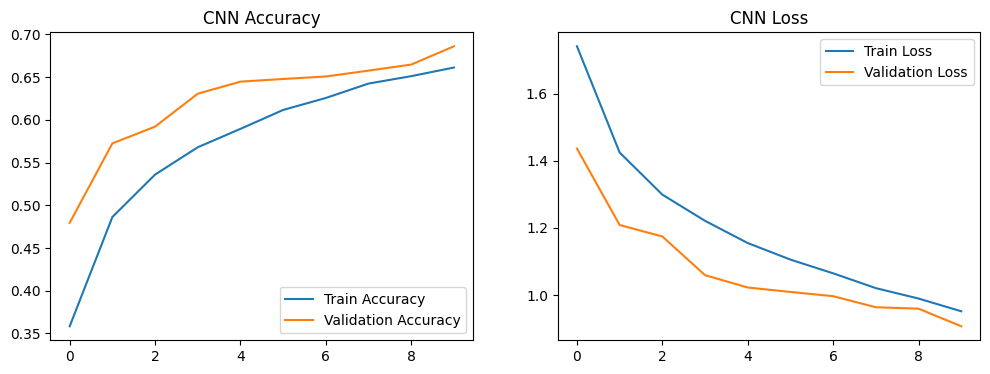

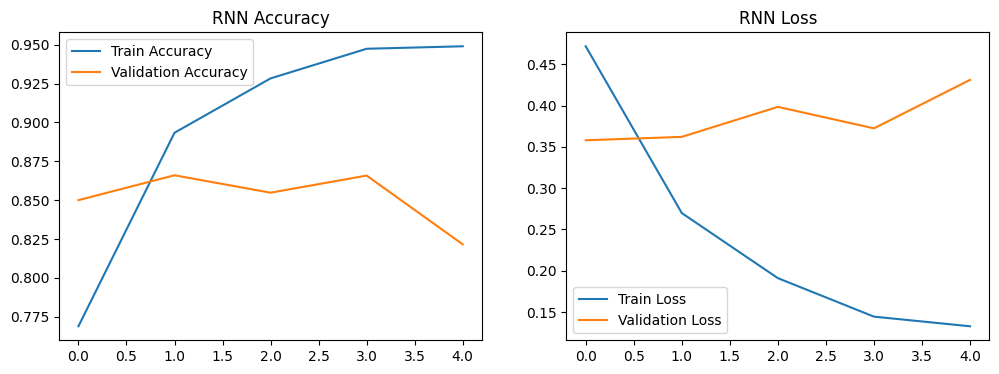

In [ ]:
import matplotlib.pyplot as plt

# CNN Accuracy & Loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.legend()
plt.show()

# RNN Accuracy & Loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Loss')
plt.legend()
plt.show()


In [ ]:
cnn_model.save("cnn_model.keras")
rnn_model.save("rnn_model.keras")


In [ ]:
from tensorflow.keras.models import load_model

cnn_model = load_model("cnn_model.keras")
rnn_model = load_model("rnn_model.keras")

# Recompile if training further
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
!unzip cnn_images.zip




Archive:  cnn_images.zip
   creating: CNN IMAGES/CNN IMAGES FAKE/
  inflating: CNN IMAGES/CNN IMAGES FAKE/_110076496_untitleddesign-1.png  
  inflating: CNN IMAGES/CNN IMAGES FAKE/17FAKEFACTS-COMBO1-articleLarge.jpg  
  inflating: CNN IMAGES/CNN IMAGES FAKE/24c24b64fd90a66b884c22db6dc2e098.jpg  
  inflating: CNN IMAGES/CNN IMAGES FAKE/FreeTV.jpg  
  inflating: CNN IMAGES/CNN IMAGES FAKE/globe-trump-front-page-570.jpg  
  inflating: CNN IMAGES/CNN IMAGES FAKE/screengrab1.png  
  inflating: CNN IMAGES/CNN IMAGES FAKE/Screen-Shot-2016-09-14-at-12.49.21.png  
  inflating: CNN IMAGES/CNN IMAGES FAKE/shot_one.png  
  inflating: CNN IMAGES/CNN IMAGES FAKE/War-of-the-Worlds-1100x611.jpg  
  inflating: CNN IMAGES/CNN IMAGES FAKE/world.jpg__2631x3211_q85_crop_subsampling-2_upscale.jpg  
   creating: CNN IMAGES/CNN IMAGES REAL/
  inflating: CNN IMAGES/CNN IMAGES REAL/1000_F_511308896_IjAzU1WhMvUXa0qzAyFJlaZcMAU9Y9MQ.jpg  
  inflating: CNN IMAGES/CNN IMAGES REAL/26-Thisday.jpg  
  inflating: CNN I

In [35]:
!ls cnn_images


fake  real


In [37]:
!find cnn_images -maxdepth 2 -type d


cnn_images
cnn_images/real
cnn_images/fake
cnn_images/.ipynb_checkpoints


In [38]:
!rm -rf cnn_images/.ipynb_checkpoints


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

project_images = datagen.flow_from_directory(
    "cnn_images",
    target_size=(128, 128),
    batch_size=8,
    class_mode='binary'
)


Found 20 images belonging to 2 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn_model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,848,417 (7.05 MB)

 Trainable params: 1,848,417 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
cnn_model.fit(
    project_images,
    epochs=3
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step - accuracy: 0.5000 - loss: 0.7035
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.6729 - loss: 0.5854
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step - accuracy: 0.7375 - loss: 0.4819


In [6]:
project_preds = cnn_model.predict(project_images)
project_preds[:5]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


array([[0.16936933],
       [0.29714534],
       [0.43436703],
       [0.33805618],
       [0.9294396 ]], dtype=float32)

In [7]:
import pandas as pd

df = pd.read_csv("/content/FakeNews_Cleaned_Sample.csv")
df.head()


,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [8]:
df['label_num'] = df['label'].map({'FAKE': 0, 'REAL': 1})


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Get text and labels
texts = df['text'].values
labels = df['label_num'].values

# Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=200)

padded_sequences.shape


(500, 200)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((400, 200), (100, 200))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

rnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
rnn_model.fit(
    X_train,
    y_train,
    epochs=3,
    batch_size=32
)


Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.0000e+00 - loss: nan


In [13]:
project_preds_seq = rnn_model.predict(X_test)
project_preds_seq[:5]


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)